In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
import plotly
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import re
import math

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train[train["Cabin"]=="C23 C25 C27"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


# sex and embarked

In [5]:
train2 = train.copy()
train2['Sex'] = train2['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
train2["Embarked"] = train2["Embarked"].fillna("S")
train2['Embarked'] = train2['Embarked'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)
train2["fam member"] = train2["SibSp"] + train2["Parch"]
train2.loc[train2["fam member"] > 0 , 'alone or not'] = 1
train2.loc[train2["fam member"] == 0 , 'alone or not'] = 0

# name

In [6]:
train2["Name"]= train2["Name"].str.replace("Mlle", "Miss", case = False)
train2["Name"]= train2["Name"].str.replace("Ms", "Miss", case = False)
train2["Name"]= train2["Name"].str.replace("Mme", "Mrs", case = False)

train2["Mr"]=train2["Name"].str.contains(pat = 'Mr. ') 
train2["Mrs"]=train2["Name"].str.contains(pat = 'Mrs. ') 
train2["Miss"]=train2["Name"].str.contains(pat = 'Miss. ')
train2["Title"]=train2["Name"].str.contains(pat = 
                                            "Col\. |Sir\. |Major|Countess|Capt|Don\. |Dr\. |Rev\. |Jonkheer\.|Dona\. |Lady\.", 
                                            regex=True)
train2["Master"]=train2["Name"].str.contains(pat = 'Master. ')

train2.loc[train2['Mr'] == True, 'all title'] = 1
train2.loc[train2['Mrs'] == True, 'all title'] = 2
train2.loc[train2['Miss'] == True, 'all title'] = 3
train2.loc[train2['Title'] == True, 'all title'] = 4
train2.loc[train2['Master'] == True, 'all title'] = 5
# train2["all title"] = train2["all title"].fillna(0)
train3 = train2.copy()

# ticket

In [7]:
train3["ticket contains string"] =train3["Ticket"].str.contains(pat = '\D+', regex=True)

train3.loc[train3['ticket contains string'] == True, 'ticket contains string'] = 1
train3.loc[train3['ticket contains string'] != True, 'ticket contains string'] = 0

In [8]:
tick = train3[['ticket contains string', 'Survived']].reset_index()
tick = tick.groupby(['ticket contains string','Survived']).count()
tick

index
ticket contains string Survived       
0                      0           407
                       1           254
1                      0           142
                       1            88

In [9]:
pclas = train3[['Pclass','Survived']].reset_index()
pclas = pclas.groupby(['Pclass','Survived']).count()
pclas

index
Pclass Survived       
1      0            80
       1           136
2      0            97
       1            87
3      0           372
       1           119

In [10]:
pclas_tick = train3[['Pclass','ticket contains string', 'Survived']].reset_index()
pclas_tick = pclas_tick.groupby(['Pclass','ticket contains string','Survived']).count()
pclas_tick

index
Pclass ticket contains string Survived       
1      0                      0            56
                              1            96
       1                      0            24
                              1            40
2      0                      0            66
                              1            61
       1                      0            31
                              1            26
3      0                      0           285
                              1            97
       1                      0            87
                              1            22

# age

In [11]:
mean_age_mr = round(train3["Age"][train3["Mr"]].mean())
mean_age_mrs = round(train3["Age"][train3["Mrs"]].mean())
mean_age_miss = round(train3["Age"][train3["Miss"]].mean())
mean_age_master = round(train3["Age"][train3["Master"]].mean())
mean_age_title = round(train3["Age"][train3["Title"]].mean())

# train3.loc[train3['Age'] == None, 'Age'] = np.nan

train3['Age'] = train3.apply(
    lambda row: mean_age_mrs  if (np.isnan(row['Age'])) & (row['Mrs']==True) else row['Age'], 
    axis=1
)
train3['Age'] = train3.apply(
    lambda row: mean_age_mr  if (np.isnan(row['Age'])) & (row['Mr']==True) else row['Age'], 
    axis=1
)
train3['Age'] = train3.apply(
    lambda row: mean_age_miss  if (np.isnan(row['Age'])) & (row['Miss']==True) else row['Age'], 
    axis=1
)
train3['Age'] = train3.apply(
    lambda row: mean_age_master  if (np.isnan(row['Age'])) & (row['Master']==True) else row['Age'], 
    axis=1
)
train3['Age'] = train3.apply(
    lambda row: mean_age_title  if (np.isnan(row['Age'])) & (row['Title']==True) else row['Age'], 
    axis=1
)

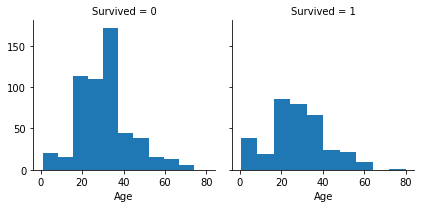

In [12]:
age = sns.FacetGrid(train3, col='Survived')
age.map(plt.hist, 'Age', bins=10)

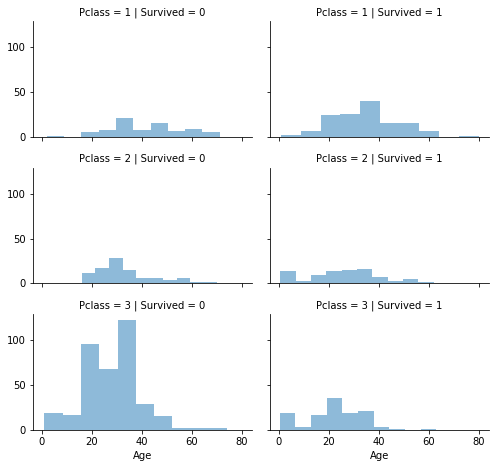

In [13]:
grid = sns.FacetGrid(train3, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=10)
# grid.add_legend();

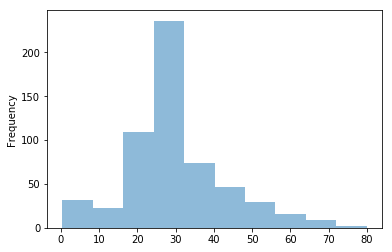

In [14]:
plt.figure();
train3[train3["Sex"]==1]["Age"].plot.hist(alpha=0.5)

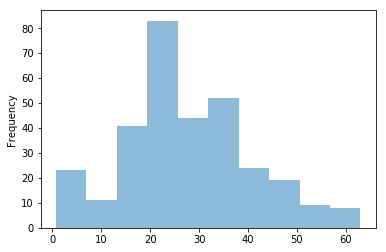

In [15]:
train3[train3["Sex"]==0]["Age"].plot.hist(alpha=0.5)

# age and stages

In [16]:
train3.loc[(train3['Age'] > 0) & (train3['Age'] <= 10) , 'age stages'] = 1
train3.loc[(train3['Age'] > 10) & (train3['Age'] <= 20) , 'age stages'] = 2
train3.loc[(train3['Age'] > 20) & (train3['Age'] <= 30) , 'age stages'] = 3
train3.loc[(train3['Age'] > 30) & (train3['Age'] <= 40) , 'age stages'] = 4
train3.loc[(train3['Age'] > 40) & (train3['Age'] <= 50) , 'age stages'] = 5
train3.loc[(train3['Age'] > 50)  , 'age stages'] = 6

In [17]:
train3["Cabin"].head(2)

0    NaN
1    C85
Name: Cabin, dtype: object

# cabin

In [18]:
def get_cabin_code(cabin):
    found = re.findall('^[A-Z]', cabin)
    if len(found) > 0:
        return found[0]
    else:
        return "0"

In [19]:
train3["Cabin"]=train3["Cabin"].fillna("unknown")

train3["cabin code"] =train3["Cabin"].apply(get_cabin_code)

# train3["cabin code"] = le.fit_transform(train3["cabin code"]).tolist()

In [20]:
train3["cabin code"].value_counts()

0    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin code, dtype: int64

In [21]:
train3.loc[train3['cabin code'] == "0", 'cabin code'] = 0
train3.loc[train3['cabin code'] == "A", 'cabin code'] = 1
train3.loc[train3['cabin code'] == "B", 'cabin code'] = 2
train3.loc[train3['cabin code'] == "C", 'cabin code'] = 3
train3.loc[train3['cabin code'] == "D", 'cabin code'] = 4
train3.loc[train3['cabin code'] == "E", 'cabin code'] = 5
train3.loc[train3['cabin code'] == "F", 'cabin code'] = 6
train3.loc[train3['cabin code'] == "G", 'cabin code'] = 7
train3.loc[train3['cabin code'] == "T", 'cabin code'] = 8

# Fare

In [22]:
train3["Fare"].mean()

32.2042079685746

In [23]:
train3["Fare"].median()

14.4542

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [25]:
train.loc[(train["Fare"]>=0) & (train["Fare"]<=10) & (train['Survived']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [26]:
train3['cabin code'].value_counts()

0    687
3     59
2     47
4     33
5     32
1     15
6     13
7      4
8      1
Name: cabin code, dtype: int64

# corelation of features

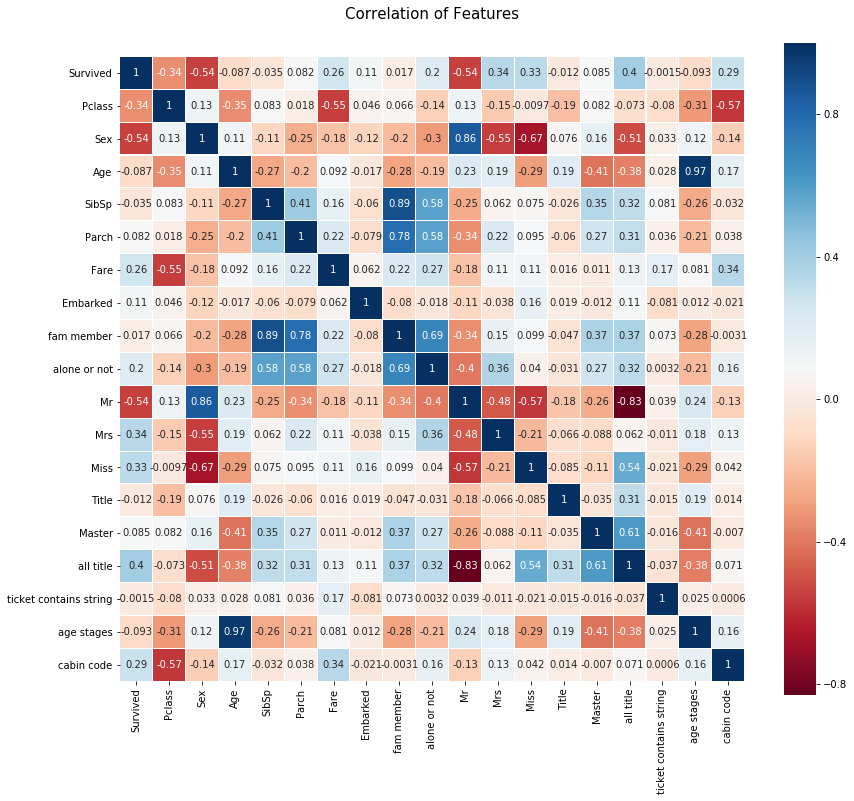

In [27]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(train3.copy().drop(columns=["Name", "Ticket","Cabin","PassengerId"]).astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# importance of features

In [28]:
train3.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'fam member',
       'alone or not', 'Mr', 'Mrs', 'Miss', 'Title', 'Master', 'all title',
       'ticket contains string', 'age stages', 'cabin code'],
      dtype='object')

In [29]:
train3.copy().drop(columns=['PassengerId', 'Mr', 'Mrs', 'Miss', 'Title', 'Master']).head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam member,alone or not,all title,ticket contains string,age stages,cabin code
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,unknown,1,1,1.0,1.0,1,3.0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,1,1.0,2.0,1,4.0,3
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,unknown,1,0,0.0,3.0,1,3.0,0


In [30]:
features = ['Parch', 'Fare', 'Embarked', 'fam member',
       'alone or not', 'all title','Mr', 'Mrs', 'Master',
       ]

In [31]:
features2 = ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'fam member',
       'alone or not', 'all title',
       'ticket contains string', 'age stages', 'cabin code'
       ]

In [32]:
from sklearn.ensemble import RandomForestClassifier
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


RANDOM_STATE = 42

clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

clf.fit(train3[features2],  train3["Survived"].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=42, verbose=False,
                       warm_start=False)

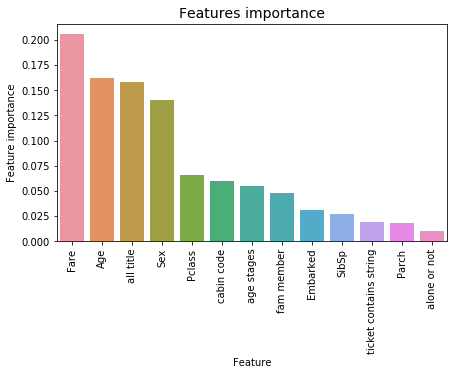

In [33]:
preds = clf.predict(train3[features2])

tmp = pd.DataFrame({'Feature': features2, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

# prepare data test

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [35]:
# test["Fare"].value_counts()

In [36]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [37]:
test["Fare"].mean()

35.6271884892086

In [38]:
test["Fare"].median()

14.4542

In [39]:
test2 = test.copy()

test2['Sex'] = test2['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test2["Embarked"] = test2["Embarked"].fillna("S")
test2['Embarked'] = test2['Embarked'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)
test2["fam member"] = test2["SibSp"] + test2["Parch"]
test2.loc[test2["fam member"] > 0 , 'alone or not'] = 1
test2.loc[test2["fam member"] == 0 , 'alone or not'] = 0

# overwriting column with replaced value of age  
test2["Name"]= test2["Name"].str.replace("Mlle", "Miss", case = False)
test2["Name"]= test2["Name"].str.replace("Ms", "Miss", case = False)
test2["Name"]= test2["Name"].str.replace("Mme", "Mrs", case = False)

test2["Mr"]=test2["Name"].str.contains(pat = 'Mr. ') 
test2["Mrs"]=test2["Name"].str.contains(pat = 'Mrs. ') 
test2["Miss"]=test2["Name"].str.contains(pat = 'Miss. ')
test2["Title"]=test2["Name"].str.contains(pat = 
                                          "Col\. |Sir\. |Major|Countess|Capt|Don\. |Dr\. |Rev\. |Jonkheer\.|Dona\. |Lady\.", 
                                          regex=True)
test2["Master"]=test2["Name"].str.contains(pat = 'Master. ')

test2.loc[test2['Mr'] == True, 'all title'] = 1
test2.loc[test2['Mrs'] == True, 'all title'] = 2
test2.loc[test2['Miss'] == True, 'all title'] = 3
test2.loc[test2['Title'] == True, 'all title'] = 4
test2.loc[test2['Master'] == True, 'all title'] = 5
# test2["all title"] = test2["all title"].fillna(0)


test2["Fare"] = test2["Fare"].fillna(test["Fare"].mean())

test3 = test2.copy()
test3.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam member,alone or not,Mr,Mrs,Miss,Title,Master,all title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,3,0,0.0,True,False,False,False,False,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,1,1,1.0,False,True,False,False,False,2.0


In [40]:
test3["ticket contains string"] =test3["Ticket"].str.contains(pat = '\D+', regex=True)

test3.loc[test3['ticket contains string'] == True, 'ticket contains string'] = 1
test3.loc[test3['ticket contains string'] != True, 'ticket contains string'] = 0
test3.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam member,alone or not,Mr,Mrs,Miss,Title,Master,all title,ticket contains string
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,3,0,0.0,True,False,False,False,False,1.0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,1,1,1.0,False,True,False,False,False,2.0,0


In [41]:
mean_age_mr_t = round(test3["Age"][test3["Mr"]].mean())
mean_age_mrs_t = round(test3["Age"][test3["Mrs"]].mean())
mean_age_miss_t = round(test3["Age"][test3["Miss"]].mean())
mean_age_master_t = round(test3["Age"][test3["Master"]].mean())
mean_age_title_t = round(test3["Age"][test3["Title"]].mean())

# test3.loc[test3['Age'] == None, 'Age'] = np.nan

test3['Age'] = test3.apply(
    lambda row: mean_age_mrs_t  if (np.isnan(row['Age'])) & (row['Mrs']==True) else row['Age'], 
    axis=1
)
test3['Age'] = test3.apply(
    lambda row: mean_age_mr_t  if (np.isnan(row['Age'])) & (row['Mr']==True) else row['Age'], 
    axis=1
)
test3['Age'] = test3.apply(
    lambda row: mean_age_miss_t  if (np.isnan(row['Age'])) & (row['Miss']==True) else row['Age'], 
    axis=1
)
test3['Age'] = test3.apply(
    lambda row: mean_age_master_t  if (np.isnan(row['Age'])) & (row['Master']==True) else row['Age'], 
    axis=1
)
test3['Age'] = test3.apply(
    lambda row: mean_age_title_t  if (np.isnan(row['Age'])) & (row['Title']==True) else row['Age'], 
    axis=1
)

In [42]:
test3.loc[(test3['Age'] > 0) & (test3['Age'] <= 10) , 'age stages'] = 1
test3.loc[(test3['Age'] > 10) & (test3['Age'] <= 20) , 'age stages'] = 2
test3.loc[(test3['Age'] > 20) & (test3['Age'] <= 30) , 'age stages'] = 3
test3.loc[(test3['Age'] > 30) & (test3['Age'] <= 40) , 'age stages'] = 4
test3.loc[(test3['Age'] > 40) & (test3['Age'] <= 50) , 'age stages'] = 5
test3.loc[(test3['Age'] > 50)  , 'age stages'] = 6

In [43]:
test3["Cabin"]=test3["Cabin"].fillna("unknown")

test3["cabin code"] =test3["Cabin"].apply(get_cabin_code)

test3.loc[test3['cabin code'] == "0", 'cabin code'] = 0
test3.loc[test3['cabin code'] == "A", 'cabin code'] = 1
test3.loc[test3['cabin code'] == "B", 'cabin code'] = 2
test3.loc[test3['cabin code'] == "C", 'cabin code'] = 3
test3.loc[test3['cabin code'] == "D", 'cabin code'] = 4
test3.loc[test3['cabin code'] == "E", 'cabin code'] = 5
test3.loc[test3['cabin code'] == "F", 'cabin code'] = 6
test3.loc[test3['cabin code'] == "G", 'cabin code'] = 7
# test3.loc[test3['cabin code'] == "T", 'cabin code'] = 8

In [44]:
test3["cabin code"].value_counts()

0    327
3     35
2     18
4     13
5      9
6      8
1      7
7      1
Name: cabin code, dtype: int64

In [45]:
test3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
PassengerId               418 non-null int64
Pclass                    418 non-null int64
Name                      418 non-null object
Sex                       418 non-null int32
Age                       418 non-null float64
SibSp                     418 non-null int64
Parch                     418 non-null int64
Ticket                    418 non-null object
Fare                      418 non-null float64
Cabin                     418 non-null object
Embarked                  418 non-null int32
fam member                418 non-null int64
alone or not              418 non-null float64
Mr                        418 non-null bool
Mrs                       418 non-null bool
Miss                      418 non-null bool
Title                     418 non-null bool
Master                    418 non-null bool
all title                 418 non-null float64
ticket contains string    418 non-

# modelling

In [46]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train3[features2],  train3["Survived"].values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [47]:
y_test_han = rf.predict(test3[features2])

y_test_han = pd.DataFrame(data=y_test_han)
y_test_han = y_test_han.round()
# y_test_han.astype(int)

In [48]:
hasil = pd.DataFrame()
hasil["PassengerId"] = test["PassengerId"]
hasil["Survived"] = y_test_han.astype(int)

# compare

In [49]:
hasil_77 = pd.read_csv("coba1.csv")
from sklearn.metrics import confusion_matrix
confusion_matrix(hasil_77["Survived"].tolist(), hasil["Survived"].tolist(), labels=[0, 1])


array([[237,  23],
       [ 18, 140]], dtype=int64)

# add to csv

In [50]:
# hasil.to_csv("semua fitur.csv", index=False)

# beda

In [51]:
train3.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'fam member',
       'alone or not', 'Mr', 'Mrs', 'Miss', 'Title', 'Master', 'all title',
       'ticket contains string', 'age stages', 'cabin code'],
      dtype='object')

In [52]:
X_train = train3.copy().drop(columns=['PassengerId','Cabin', 'Survived','Name','Ticket','Mr', 'Mrs', 'Miss', 'Title'],   axis=1)
Y_train = train3["Survived"]
X_test  = test3.copy().drop(columns=['PassengerId','Cabin', 'Name','Ticket','Mr', 'Mrs', 'Miss', 'Title'], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 14), (891,), (418, 14))

In [53]:
# Decision Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

99.1

In [54]:
submission = pd.DataFrame({
        "PassengerId": test3["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

In [55]:
confusion_matrix(hasil_77["Survived"].tolist(), submission["Survived"].tolist(), labels=[0, 1])

array([[227,  33],
       [ 22, 136]], dtype=int64)

In [57]:
submission.to_csv('coba decision tree4.csv', index=False)